In [1]:
import os
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hayden/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hayden/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [4]:
def get_tidyTweet(s):
    url_pattern = re.compile(r'https?://\S+')
    no_url = url_pattern.sub(r'', str(s))
    username_pattern = re.compile(r'@\w+')
    no_username = username_pattern.sub(r'', no_url)
    hashtag_pattern = re.compile(r'#\w+')
    no_hashtag = hashtag_pattern.sub(r'', no_username)
    amp_pattern = re.compile(r'&amp;')
    tidy_tweet = amp_pattern.sub(r'and', no_hashtag)
    return tidy_tweet

def remove_punct(s):
    punct_pattern = re.compile(r'[^\w\s\']')
    no_punct = punct_pattern.sub(r'', str(s))
    return no_punct

def normalize_words(tokens):
    norm_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return norm_tokens

def remove_stopwords(tokens):
    result_tokens = []
    for t in tokens:
        if (t not in stopword and len(t) > 2 and not t.isnumeric()):
            result_tokens.append(t)
    return result_tokens

def words_preprocessing(tweet):
    tidy_tweet = get_tidyTweet(tweet).lower()
    tidy_tweet = remove_punct(tidy_tweet)
    tokens = tidy_tweet.split()
    norm_tokens = normalize_words(tokens)
    result_tokens = remove_stopwords(norm_tokens)
    return result_tokens

In [5]:
df = pd.read_csv('./conspiracy_theories_data.csv')
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [6]:
df1 = pd.read_csv('./dataset.csv')
df1 = df1.drop_duplicates()
df1 = df1.reset_index(drop=True)

In [7]:
df_merged = pd.merge(df1, df, on='id', how='left')
df_merged = df_merged.drop(columns=['date_y', 'tweet_y', 'tidyTweet_y'])
df_merged = df_merged.rename(columns={'date_x':'date', 'tweet_x':'tweet', 'tidyTweet_x':'tidyTweet'})
df_merged

,id,date,tweet,tidyTweet,Label,search
0,1484309873059934208,2022-01-20 15:40:25,@77WABCradio @RudyGiuliani I suppose all the e...,"I suppose all the election fraud, the Biden ...",1.0,#americafirst
1,1484309738808840192,2022-01-20 15:39:53,The press had a lot of questions about Ukraine...,The press had a lot of questions about Ukraine...,0.0,#americafirst
2,1484309298867933186,2022-01-20 15:38:08,"Nevada, vote for the candidate who has the rig...","Nevada, vote for the candidate who has the rig...",0.0,#americafirst
3,1484307683532754944,2022-01-20 15:31:43,@POTUS PLEASE TAKE ACTION AND ABOLISH YOUR TRU...,PLEASE TAKE ACTION AND ABOLISH YOUR TRUTH IN S...,0.0,#americafirst
4,1484306314432032768,2022-01-20 15:26:17,#Trump Backs Banning #NancyPelosi from #StockT...,#Trump Backs Banning #NancyPelosi from #StockT...,0.0,#americafirst
...,...,...,...,...,...,...
11789,1502633293023428610,2022-03-12 05:11:09,Seems to be a new strain of Covid coming our w...,Seems to be a new strain of Covid coming our w...,0.0,#wheresfauci
11790,1502623553891741701,2022-03-12 04:32:27,@MusicManVA 🐸🐷 Missing❗️ 🌸 #WheresFauci??? ...,🐸🐷 Missing❗️ 🌸 #WheresFauci??? 😆,1.0,#wheresfauci
11791,1502621900618489856,2022-03-12 04:25:53,#WheresFauci ?? His stubby little fingerprin...,#WheresFauci ?? His stubby little fingerprin...,1.0,#wheresfauci
11792,1502607009652293634,2022-03-12 03:26:42,good morning...#WheresFauci,good morning...#WheresFauci,0.0,#wheresfauci


In [8]:
df_words = df_merged.loc[df_merged['Label']==1]['tweet'].apply(words_preprocessing)
df_words = df_words[df_words.str.len()!=0]
df_words = df_words.reset_index(drop=True)

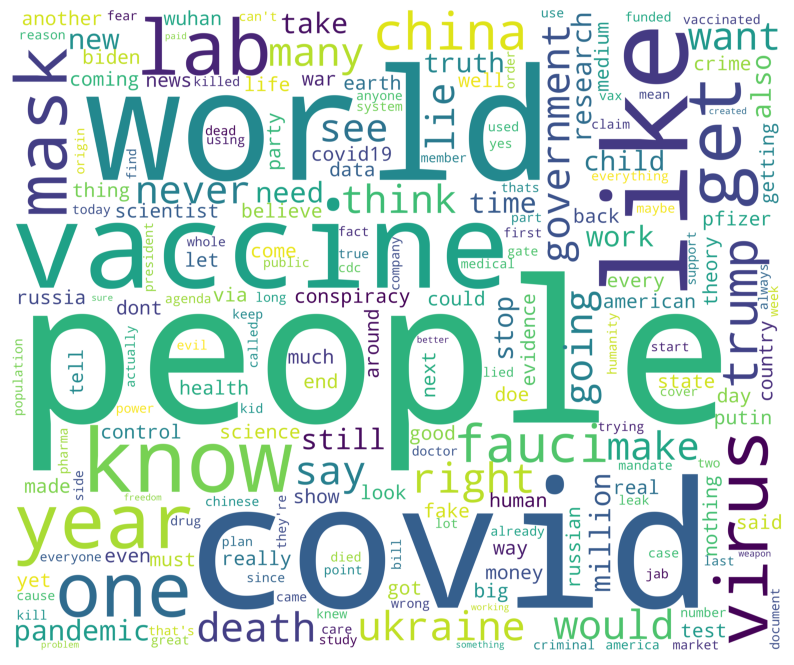

In [10]:
word_list = list(df_words.explode())
nltk_count = nltk.FreqDist(word_list)
wordcloud = WordCloud(
    background_color='white',
    scale=20,
    height=500,
    width=600,
    ).generate_from_frequencies(nltk_count)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud_label1.png', transparent=True)

In [11]:
frequency = {}
for k, v in nltk_count.most_common(100):
    frequency[k] = v/len(df)
print('Top 50 most frequent tokens in D1:')
print(frequency)

Top 50 most frequent tokens in D1:
{'people': 0.025560426834312186, 'covid': 0.0194391595665481, 'world': 0.014972288857639177, 'vaccine': 0.014227810406154355, 'like': 0.013566051782612292, 'know': 0.013317892298784018, 'year': 0.013152452642898502, 'lab': 0.012987012987012988, 'one': 0.012821573331127472, 'get': 0.012407974191413682, 'virus': 0.011415336256100587, 'mask': 0.01091901728844404, 'china': 0.010009099181073703, 'fauci': 0.009926379353130945, 'trump': 0.009595500041359914, 'right': 0.009512780213417156, 'would': 0.009181900901646124, 'say': 0.009099181073703366, 'many': 0.008933741417817852, 'government': 0.008851021589875094, 'ukraine': 0.008768301761932336, 'death': 0.008685581933989578, 'want': 0.008023823310447514, 'make': 0.008023823310447514, 'going': 0.007858383654561998, 'lie': 0.007858383654561998, 'think': 0.0077756638266192404, 'see': 0.0077756638266192404, 'never': 0.0076102241707337245, 'pandemic': 0.007527504342790967, 'new': 0.007527504342790967, 'still': 0.

In [12]:
df_freq = pd.DataFrame(nltk_count.most_common(20), columns=['word', 'count'])

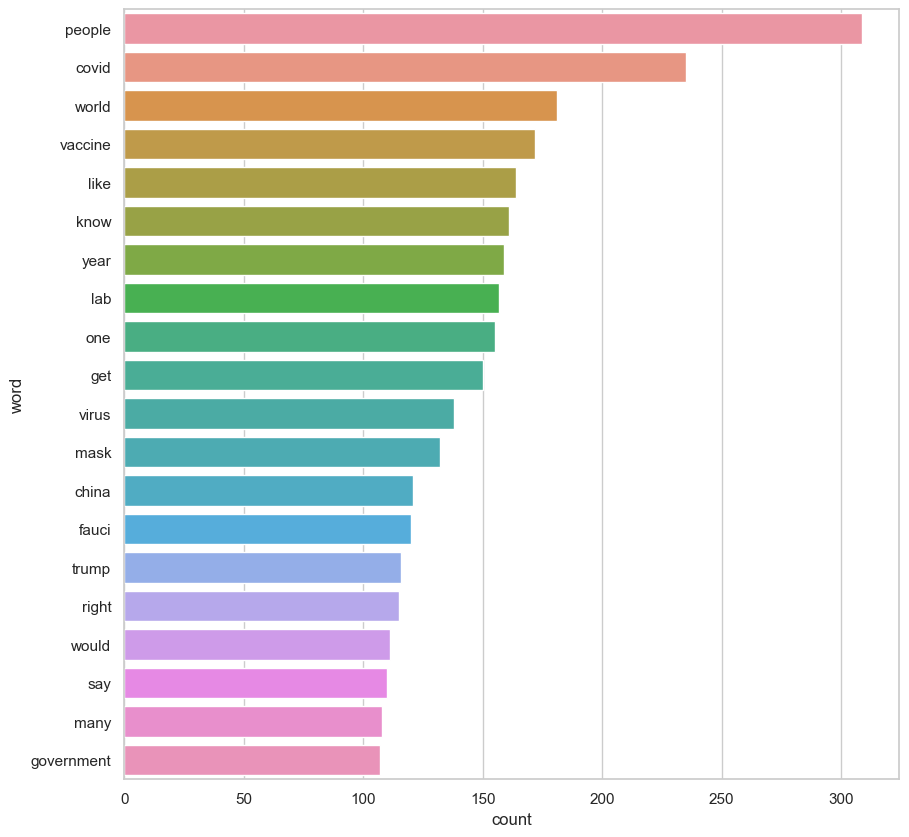

In [13]:
fig1 = plt.figure(figsize=(10, 10))
sns.set_theme(style='whitegrid')
sns.barplot(x='count', y='word', data=df_freq)
plt.show()
fig1.savefig('Top50_tokens_label1.png', transparent=True)

In [19]:
# graph for All Data
df_words = df['tweet'].apply(words_preprocessing)
df_words = df_words[df_words.str.len()!=0]
df_words = df_words.reset_index(drop=True)

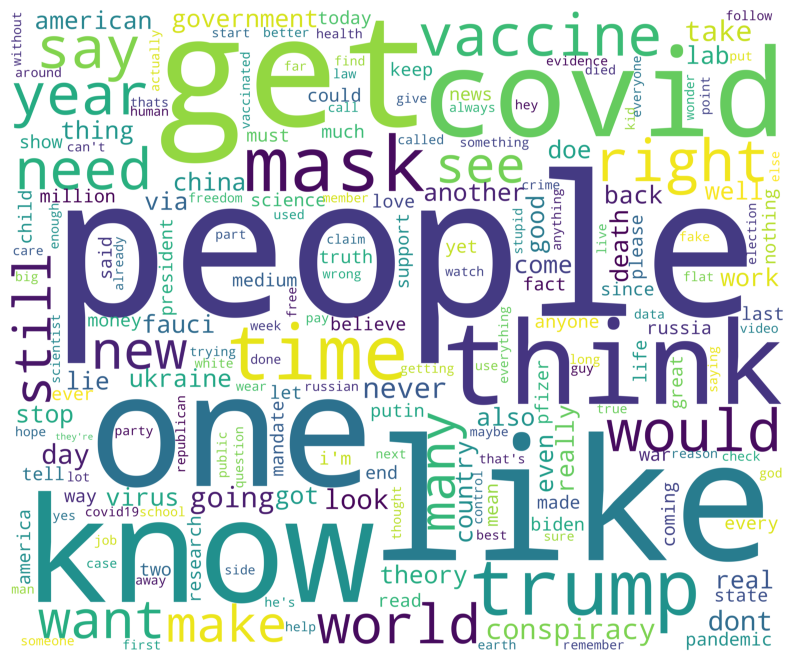

In [20]:
word_list = list(df_words.explode())
nltk_count = nltk.FreqDist(word_list)
wordcloud = WordCloud(
    background_color='white',
    scale=20,
    height=500,
    width=600,
    ).generate_from_frequencies(nltk_count)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud.png', transparent=True)

In [21]:
frequency = {}
for k, v in nltk_count.most_common(100):
    frequency[k] = v/len(df)
print('Top 50 most frequent tokens in D1:')
print(frequency)

Top 50 most frequent tokens in D1:
{'people': 0.08371246587807098, 'like': 0.06022003474232773, 'one': 0.05285797005542228, 'get': 0.050541814873025066, 'know': 0.04466870708908925, 'covid': 0.04375878898171892, 'think': 0.0388783191330962, 'trump': 0.03805112085366862, 'time': 0.03738936223012656, 'mask': 0.037141202746298285, 'right': 0.036727603606584495, 'say': 0.03647944412275622, 'would': 0.03647944412275622, 'vaccine': 0.035817685499214165, 'year': 0.03573496567127141, 'need': 0.03391512945653073, 'world': 0.031102655306476962, 'want': 0.030275457027049382, 'new': 0.029944577715278354, 'still': 0.02845562081230871, 'see': 0.027132103565224584, 'make': 0.026966663909339068, 'many': 0.026966663909339068, 'conspiracy': 0.02647034494168252, 'going': 0.025312267350483912, 'never': 0.02506410786665564, 'take': 0.02456778889899909, 'dont': 0.023244271651914963, 'look': 0.022417073372487384, 'day': 0.022334353544544626, 'government': 0.02183803457688808, 'thing': 0.021755314748945324, '

In [22]:
df_freq = pd.DataFrame(nltk_count.most_common(20), columns=['word', 'count'])

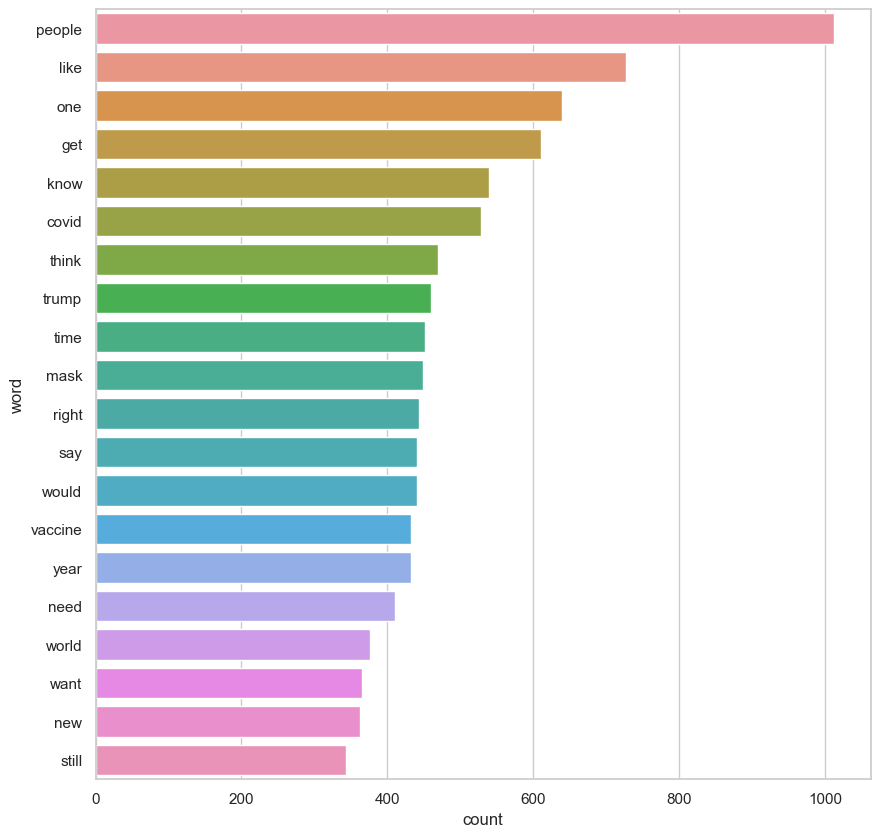

In [23]:
fig1 = plt.figure(figsize=(10, 10))
sns.set_theme(style='whitegrid')
sns.barplot(x='count', y='word', data=df_freq)
plt.show()
fig1.savefig('Top50_tokens.png', transparent=True)